In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
!date
!whoami

Sun Sep 19 23:16:51 PDT 2021
ndbs


In [94]:
from scipy.optimize import minimize

# Implement method of moments for some distributions

In [7]:
def beta_dist_from_mean_and_variance(mean, variance):
    """
    Returns a beta distribution with the specified mean and variance.
    I.e. implements the method of moments for the Beta distribution.
    """
    if mean <= 0 or mean >= 1:
        raise ValueError("Mean must be in the interval (0,1)")
    if variance >= mean*(1-mean):
        raise ValueError(f"Variance too large: {variance} >= {mean*(1-mean)}")

    # For derivations of these formulas, see:
    # https://en.wikipedia.org/wiki/Beta_distribution#Mean_and_variance
    relative_variance = mean*(1-mean)/variance - 1
    a = mean*relative_variance
    b = (1-mean)*relative_variance
    return stats.beta(a,b) # a,b can be recovered from dist.args

def lognorm_dist_from_mean_and_variance(mean, variance):
    """Method of moments for lognormal distribution.
    See https://en.wikipedia.org/wiki/Log-normal_distribution
    """
    mean_squared = mean**2
    median = mean_squared / np.sqrt(variance + mean_squared)
    # median = mean / np.sqrt(1+ variance / mean_squared)
    sigma_squared = np.log(1+ variance / mean_squared)
    return stats.lognorm(s=np.sqrt(sigma_squared), scale=median)

def normal_dist_from_mean_and_variance(mean, variance):
    """Method of moments for normal distribution."""
    return stats.norm(mean, np.sqrt(variance))

In [30]:
def beta_approx_median(a,b):
    return (a-1/3)/(a+b-2/3)

# Write a function to find a 2-parameter distribution with a given median (or other quantile) given a fixed other parameter (e.g. variance), using a function that returns a distribution with a specified mean and other parameter

In [2]:
float('-inf')

-inf

In [5]:
np.inf

inf

In [6]:
-np.inf

-inf

In [8]:
np.tan(1)

1.557407724654902

In [9]:
np.arctan(1)

0.7853981633974483

In [10]:
np.arctan(np.inf)

1.5707963267948966

In [12]:
np.tan(np.pi/2)

1.633123935319537e+16

In [14]:
np.arctan(np.tan(np.pi/2))

1.5707963267948966

In [15]:
np.arctan(-np.inf)

-1.5707963267948966

In [91]:
def two_param_distribution_from_quantile_and_parameter(
    dist_from_mean_and_parameter,
    quantile,
    quantile_rank,
    parameter,
    mean_bounds=(-np.inf, np.inf),
    initial_mean=None,
    max_iterations=1000,
    rtol=1e-05,
    atol=1e-08
):
    """
    Woo hoo!
    """
    def to_mean(x): # Map finite interval [-pi/2, pi/2] to [-inf, inf]
        return np.tan(x)
    def from_mean(mean): # Map [-inf, inf] back to finite interval [-pi/2, pi/2]
        return np.arctan(mean)
    x_lower_bound, x_upper_bound = from_mean(mean_bounds)
    x = (x_lower_bound + x_upper_bound) / 2 if initial_mean is None else from_mean(initial_mean)
#     mean_inside = lower <= mean <= upper
#     mean_outside = not mean_inside
    found = False
    iterations = 0
    while not found and iterations < max_iterations:
        dist = dist_from_mean_and_parameter(to_mean(x), parameter)
        q = dist.ppf(quantile_rank)
        if np.allclose(q, quantile, rtol, atol):
            found = True
        elif q < quantile:
            # Need to shift quantile right -> increase mean
            x_lower_bound = x
            x = (x+x_upper_bound)/2
        else:
            # Need to shift quantile left -> decease mean
            x_upper_bound = x
            x = (x_lower_bound+x)/2
        iterations += 1
    print(iterations)
    return dist

In [21]:
def relative_error(x,y):
    return np.abs((x-y)/y)

def plot_pdf(dist, label, ax=None):
    if ax is None: ax = plt.gca()
    x = np.linspace(dist.ppf(0.001), dist.ppf(0.999), 200)
    ax.plot(x, dist.pdf(x), lw=2, alpha=0.8, label=label)

def print_distribution_info(distributions, lower, upper, desired_prob=.95):
    for d in distributions:
        print(f"mv={d.stats()}, med={d.median()}, int={d.interval(desired_prob)}")
        p_lower, p_upper = d.cdf((lower, upper))
        print(f"P(X <= {lower}) = {p_lower}, P(X <= {upper}) = {p_upper}")
        print(f"P(X in ({lower}, {upper})) = {p_upper-p_lower}")
        print(f"relative error = {relative_error(p_upper-p_lower, desired_prob)}\n")

# Try finding a Beta distribution with a specified median and variance

12
mv=(array(0.34209377), array(0.06)), med=0.29999853769035234, int=(0.010903558021360308, 0.8638021671497799)


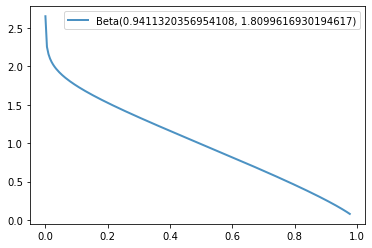

In [46]:
quantile = 0.3
quantile_rank = 0.5
variance = 0.06
beta_dist = two_param_distribution_from_quantile_and_parameter(
    beta_dist_from_mean_and_variance,
    quantile,
    quantile_rank,
    variance,
    initial_mean = None,
    mean_bounds = (0,1)
)
d = beta_dist
print(f"mv={d.stats()}, med={d.median()}, int={d.interval(.95)}")
plot_pdf(d, f"Beta{d.args}")
plt.legend();

In [43]:
beta_approx_median(*beta_dist.args)

0.29159391046736743

17
mv=(array(0.65790462), array(0.06)), med=0.6999993135550945, int=(0.13619723570366865, 0.989096101510155)


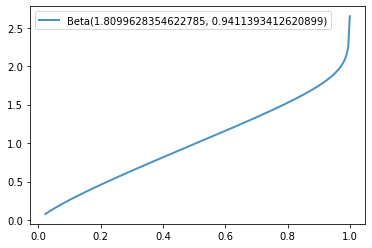

In [76]:
quantile = 0.7
quantile_rank = 0.5
variance = 0.06
beta_dist = two_param_distribution_from_quantile_and_parameter(
    beta_dist_from_mean_and_variance,
    quantile,
    quantile_rank,
    variance,
    initial_mean = None,
    mean_bounds = (0,1)
)
d = beta_dist
print(f"mv={d.stats()}, med={d.median()}, int={d.interval(.95)}")
plot_pdf(d, f"Beta{d.args}")
plt.legend();

# Try finding a Beta distribution with a specified quantile and variance

16
mv=(array(0.54909875), array(0.06)), med=0.5607189559386572, q=0.749994727645314, int=(0.0891589635575623, 0.9543464336336536)


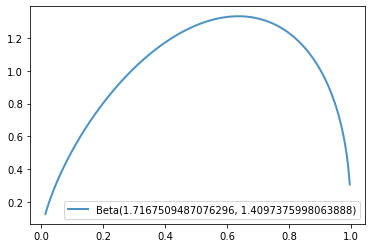

In [85]:
quantile = 0.75
quantile_rank = 0.75
variance = 0.06
beta_dist = two_param_distribution_from_quantile_and_parameter(
    beta_dist_from_mean_and_variance,
    quantile,
    quantile_rank,
    variance,
    initial_mean = None,
    mean_bounds = (0,1)
)
d = beta_dist
print(f"mv={d.stats()}, med={d.median()}, q={d.ppf(quantile_rank)}, int={d.interval(.95)}")
plot_pdf(d, f"Beta{d.args}")
plt.legend();

17
mv=(array(0.45089794), array(0.06)), med=0.4392769334834615, q=0.25000166609149466, int=(0.0456522246178446, 0.9108395106321763)


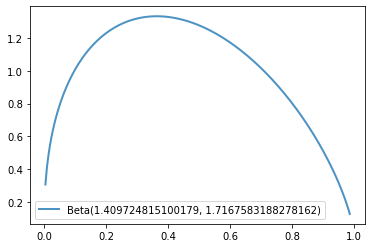

In [88]:
quantile = 0.25
quantile_rank = 0.25
variance = 0.06
beta_dist = two_param_distribution_from_quantile_and_parameter(
    beta_dist_from_mean_and_variance,
    quantile,
    quantile_rank,
    variance,
    initial_mean = None,
    mean_bounds = (0,1)
)
d = beta_dist
print(f"mv={d.stats()}, med={d.median()}, q={d.ppf(quantile_rank)}, int={d.interval(.95)}")
plot_pdf(d, f"Beta{d.args}")
plt.legend();

# Try finding a lognormal distribution with a specified quartile and variance

20
mv=(array(34.14096342), array(100.)), med=32.764412715587945, q=26.99991608944931, int=(18.67218266521272, 57.492300704479604)


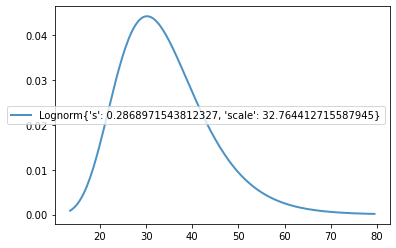

In [51]:
quantile = 27
quantile_rank = 0.25
variance = 100
lognorm_dist = two_param_distribution_from_quantile_and_parameter(
    lognorm_dist_from_mean_and_variance,
    quantile,
    quantile_rank,
    variance,
    initial_mean = None,
    mean_bounds = (0,np.inf)
)
d = lognorm_dist
print(f"mv={d.stats()}, med={d.median()}, q={d.ppf(quantile_rank)}, int={d.interval(.95)}")
plot_pdf(d, f"Lognorm{d.kwds}")
plt.legend();

# Try finding a lognormal distribution with a specified quartile and median

mv=(array(100.), array(101111.11111111)), med=30.0, int=(1.4330602429309907, 628.0266335204861)


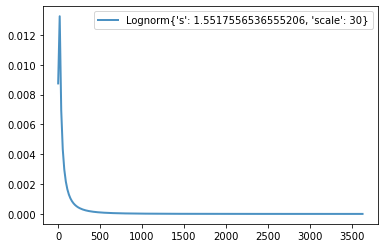

In [54]:
def lognorm_dist_from_mean_and_median(mean, median):
    if mean <= median:
        raise ValueError(f"mean must be larger than median! {mean=}, {median=}")
    sigma = np.sqrt(2*np.log(mean/median))
    return stats.lognorm(s=sigma, scale=median)

d = lognorm_dist_from_mean_and_median(100, 30)
print(f"mv={d.stats()}, med={d.median()}, int={d.interval(.95)}")
plot_pdf(d, f"Lognorm{d.kwds}")
plt.legend();

13
mv=(array(42.39006446), array(3369.34281269)), med=25.0, q=49.99980483748473, int=(3.335783370372985, 187.36228663737137)


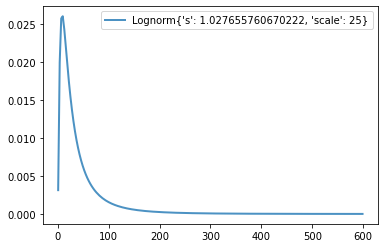

In [75]:
quantile = 50
quantile_rank = 0.75
median = 25
lognorm_dist = two_param_distribution_from_quantile_and_parameter(
    lognorm_dist_from_mean_and_median,
    quantile,
    quantile_rank,
    median,
    initial_mean = None,
    mean_bounds = (median,np.inf)
)
d = lognorm_dist
print(f"mv={d.stats()}, med={d.median()}, q={d.ppf(quantile_rank)}, int={d.interval(.95)}")
plot_pdf(d, f"Lognorm{d.kwds}")
plt.legend();

1000
mv=(array(1.63312394e+16), array(2.84535571e+61)), med=50.0, q=0.20143194925571467, int=(5.494481293131842e-06, 455002004.12457967)


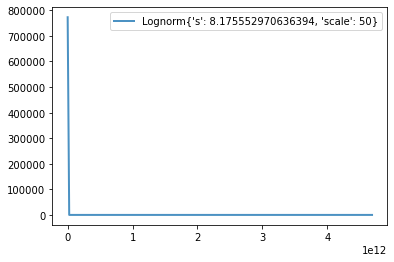

In [79]:
quantile = 25
quantile_rank = 0.25
median = 50
lognorm_dist = two_param_distribution_from_quantile_and_parameter(
    lognorm_dist_from_mean_and_median,
    quantile,
    quantile_rank,
    median,
    initial_mean = None,
    mean_bounds = (median,np.inf)
)
d = lognorm_dist
print(f"mv={d.stats()}, med={d.median()}, q={d.ppf(quantile_rank)}, int={d.interval(.95)}")
plot_pdf(d, f"Lognorm{d.kwds}")
plt.legend();

2000
mv=(array(1.63312394e+16), array(2.84535571e+61)), med=50.0, q=0.20143194925571467, int=(5.494481293131842e-06, 455002004.12457967)


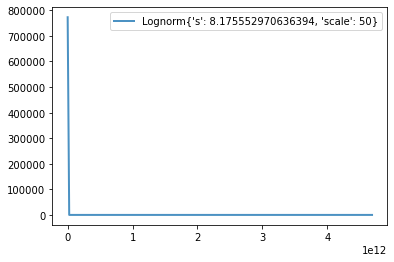

In [141]:
quantile = 25
quantile_rank = 0.25
median = 50
lognorm_dist = two_param_distribution_from_quantile_and_parameter(
    lognorm_dist_from_mean_and_median,
    quantile,
    quantile_rank,
    median,
    initial_mean = 85,
#     initial_mean = 84, # Fails with ValueError: mean must be larger than median! mean=49.9999999999999, median=50
    mean_bounds = (median,np.inf)
)
d = lognorm_dist
print(f"mv={d.stats()}, med={d.median()}, q={d.ppf(quantile_rank)}, int={d.interval(.95)}")
plot_pdf(d, f"Lognorm{d.kwds}")
plt.legend();

In [121]:
np.tan(np.arctan((median,np.inf)).mean())

100.00999900019946

# Try `scipy.optimize.minimize` to see if it can solve the above problem

In [104]:
def loss(x,y):
    return (x-y)**2

def objective_function(mean, median, quantile, quantile_rank):
    dist = lognorm_dist_from_mean_and_median(mean, median)
    q = dist.ppf(quantile_rank)
    return loss(q, quantile)

In [105]:
quantile = 25
quantile_rank = 0.25
median = 50
minimize(objective_function, 100, args=(median, quantile, quantile_rank), bounds=[(median, np.inf)])

      fun: array([1.58212349e-15])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.577094e-08])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 18
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([84.78063332])

mv=(array(84.78063332), array(13477.77751034)), med=50.0, q=24.99999996114088, int=(6.671491040329464, 374.72882521873856)


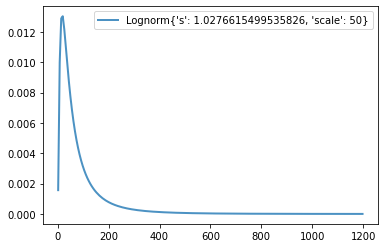

In [101]:
lognorm_dist = lognorm_dist_from_mean_and_median(84.78063332, median)
d = lognorm_dist
print(f"mv={d.stats()}, med={d.median()}, q={d.ppf(quantile_rank)}, int={d.interval(.95)}")
plot_pdf(d, f"Lognorm{d.kwds}")
plt.legend();

# Rewrite my optimization function using `scipy.optimize.minimize`

In [106]:
f = lambda x,y: (x-y)**2
print(f(1,3), f(2,5))

4 9


In [108]:
mean_bounds=(0, np.inf)
np.tan(np.arctan(mean_bounds).mean())

0.9999999999999999

In [138]:
mean_bounds=(1000, np.inf)
np.tan(np.arctan(mean_bounds).mean())

2000.0004999994173

In [140]:
np.arctan(mean_bounds)

array([1.56979633, 1.57079633])

In [118]:
def two_param_distribution_from_quantile_and_parameter2(
    dist_from_mean_and_parameter,
    quantile,
    quantile_rank,
    parameter,
    mean_bounds=(-np.inf, np.inf),
    initial_mean=None,
    loss = lambda x,y: (x-y)**2,
    **kwargs,
):
    """
    Using scipy.optimize.minimize!
    """
    if initial_mean is None:
        initial_mean = np.tan(np.arctan(mean_bounds).mean())
        
    def objective_function(mean):
        dist = dist_from_mean_and_parameter(mean, parameter)
        q = dist.ppf(quantile_rank)
        return loss(q, quantile)
    
    result = minimize(objective_function, initial_mean, bounds=[mean_bounds], **kwargs)
    best_mean = result.x.flat[0]
    return dist_from_mean_and_parameter(best_mean, parameter), result

# Try finding some of the above distributions using the new version

      fun: array([1.64573269e-15])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.60774556e-08])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 18
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([84.78063333])
mv=(array(84.78063333), array(13477.77751745)), med=50.0, q=24.99999995943237, int=(6.671491039004593, 374.72882529315484)


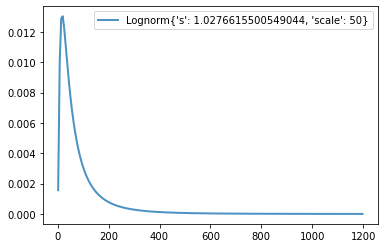

In [119]:
quantile = 25
quantile_rank = 0.25
median = 50
lognorm_dist, result = two_param_distribution_from_quantile_and_parameter2(
    lognorm_dist_from_mean_and_median,
    quantile,
    quantile_rank,
    median,
    initial_mean = None,
    mean_bounds = (median,np.inf)
)
print(result)
d = lognorm_dist
print(f"mv={d.stats()}, med={d.median()}, q={d.ppf(quantile_rank)}, int={d.interval(.95)}")
plot_pdf(d, f"Lognorm{d.kwds}")
plt.legend();

      fun: array([1.84976453])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-9.95041849e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 40
      nit: 19
     njev: 20
   status: 0
  success: True
        x: array([68691.17574032])
mv=(array(68691.17574032), array(8.90560772e+15)), med=50.0, q=3.8497645263054756, int=(0.029053956638253362, 86046.80013559393)


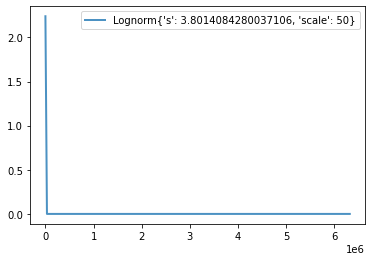

In [135]:
quantile = 2
quantile_rank = 0.25
median = 50
lognorm_dist, result = two_param_distribution_from_quantile_and_parameter2(
    lognorm_dist_from_mean_and_median,
    quantile,
    quantile_rank,
    median,
    initial_mean = None,
    mean_bounds = (median,np.inf),
    loss = lambda x,y: np.abs(x-y)
)
print(result)
d = lognorm_dist
print(f"mv={d.stats()}, med={d.median()}, q={d.ppf(quantile_rank)}, int={d.interval(.95)}")
plot_pdf(d, f"Lognorm{d.kwds}")
plt.legend();

      fun: array([3.36418033e-13])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.25263667e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 10
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([0.54910305])
mv=(array(0.54910305), array(0.06)), med=0.5607243044749067, q=0.7499994199844542, int=(0.08916094888670556, 0.9543481794658628)


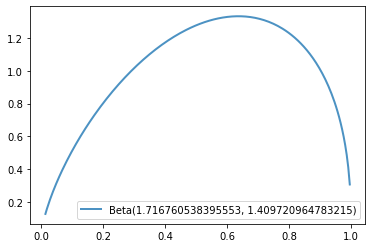

In [136]:
quantile = 0.75
quantile_rank = 0.75
variance = 0.06
beta_dist, result = two_param_distribution_from_quantile_and_parameter2(
    beta_dist_from_mean_and_variance,
    quantile,
    quantile_rank,
    variance,
    initial_mean = None,
    mean_bounds = (0,1)
)
print(result)
d = beta_dist
print(f"mv={d.stats()}, med={d.median()}, q={d.ppf(quantile_rank)}, int={d.interval(.95)}")
plot_pdf(d, f"Beta{d.args}")
plt.legend();